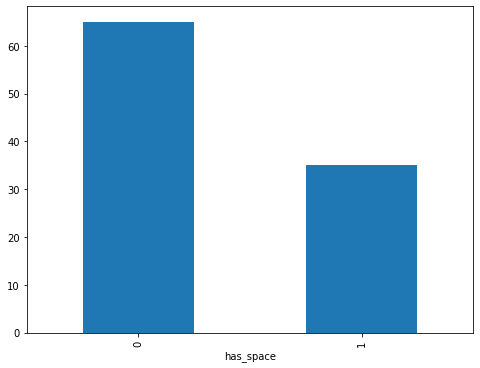

(100, 62)
# '0':
  . Most correlated unigrams:
. space
. private
  . Most correlated bigrams:
. coworking space
. private offices
# '1':
  . Most correlated unigrams:
. space
. private
  . Most correlated bigrams:
. coworking space
. private offices
# '2':
  . Most correlated unigrams:
. space
. private
  . Most correlated bigrams:
. coworking space
. private offices
# '3':
  . Most correlated unigrams:
. space
. private
  . Most correlated bigrams:
. coworking space
. private offices
# '4':
  . Most correlated unigrams:
. space
. private
  . Most correlated bigrams:
. coworking space
. private offices
# '5':
  . Most correlated unigrams:
. space
. private
  . Most correlated bigrams:
. coworking space
. private offices
# '6':
  . Most correlated unigrams:
. space
. private
  . Most correlated bigrams:
. coworking space
. private offices
# '7':
  . Most correlated unigrams:
. space
. private
  . Most correlated bigrams:
. coworking space
. private offices
# '8':
  . Most correlated uni

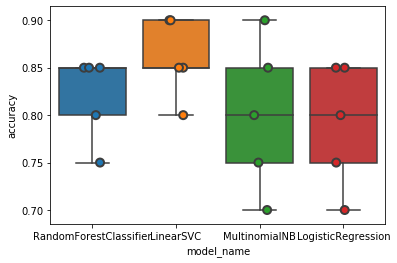

model_name
LinearSVC                 0.86
LogisticRegression        0.79
MultinomialNB             0.80
RandomForestClassifier    0.82
Name: accuracy, dtype: float64

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score


df = pd.read_csv('ra_data_classifier.csv',encoding='mac_roman')
df.head()
hid = df['chunk']

fig = plt.figure(figsize=(8,6))
df.groupby('has_space').hid.count().plot.bar(ylim=0)
plt.show()

has_space=df['has_space']

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2),
                        stop_words='english')
features = tfidf.fit_transform(df.chunk).toarray()
labels = df.has_space
print(features.shape)

from sklearn.feature_selection import chi2
import numpy as np
N = 2
for Product, category_id in sorted(has_space.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

X_train, X_test, y_train, y_test = train_test_split(df['chunk'], df['has_space'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

print(clf.predict(count_vect.transform(["Contact us below to schedule a tour. We are available Monday-Friday,10:00AM-9:00PM."])))

models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

cv_df.groupby('model_name').accuracy.mean()